# **Assignment: Hydrograph Separation**

Using the attached streamflow data, write a programme in Python or Matlab to generate a storm hydrograph and separate the direct runoff and baseflow component applying the variable slope method. For more clarification, refer the pre-recorded video that I have shared today. 

**By: Anushk Naval**       
**Roll no: 18046**

## Librabries 

In [1]:
#For importing required modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
# For warning removal
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

## Data import and cleaning

In [3]:
dataset = pd.read_csv('StreamFlowData.txt',sep="\t")
dataset.head()

,Date,Unnamed: 1,Time,Q (cfs)
0,2000/09/24,00 : 00,1.5,NaN
1,2000/09/24,00 : 15,1.5,NaN
2,2000/09/24,00 : 30,1.5,NaN
3,2000/09/24,00 : 45,1.5,NaN
4,2000/09/24,01 : 00,1.5,NaN


In [4]:
df = dataset.rename(columns = {'Time':'Q(cfs)','Unnamed: 1':'Time'})
df.drop(['Q (cfs)'],axis=1,inplace=True)
df['Delta T'] = np.arange(len(df)) + 1
df.head()

,Date,Time,Q(cfs),Delta T
0,2000/09/24,00 : 00,1.5,1
1,2000/09/24,00 : 15,1.5,2
2,2000/09/24,00 : 30,1.5,3
3,2000/09/24,00 : 45,1.5,4
4,2000/09/24,01 : 00,1.5,5


In [5]:
df.shape

(672, 4)

## Data visualization

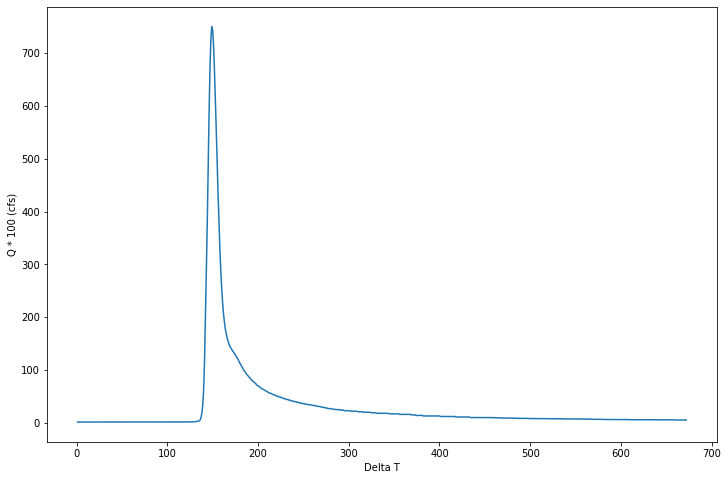

In [6]:
plt.figure(figsize=(12,8))
x = df['Delta T']
y = df['Q(cfs)']

_ = plt.plot(x,y)
_ = plt.xlabel("Delta T")
_ = plt.ylabel("Q * 100 (cfs)")

## Variable slope method

**Direct runoff starting and stopping point calculations**

In [7]:
def slope(x1, y1, x2, y2):
    m = 0
    b = (x2 - x1)
    d = (y2 - y1)
    if b != 0:
        m = (d)/(b) 

    return m

In [8]:
# For start of surface runoff:
s1 = 0
s2 = 0
i = 2
c = 0

while i<len(x)-1:   
    if abs(slope(x[i-1],y[i-1],x[i],y[i])-slope(x[i-2],y[i-2],x[i],y[i]))>0.1:
        c = i-2
        break
    i = i+1

start = df.get_value(c,"Delta T")
print("The direct runoff starts at:",start)

# For stop of surface runoff:
s1 = 0
s2 = 0
i = len(x)-1
c = 0 

while i>=2:   
    if abs(slope(x[i-1],y[i-1],x[i],y[i])-slope(x[i-2],y[i-2],x[i],y[i]))>0.2:
        c = i-2
        break
    i = i-1

stop = df.get_value(c,"Delta T")
print("The direct runoff stops at:",stop)

The direct runoff starts at: 129
The direct runoff stops at: 433


**Point of peak and point of inflection calculation**

In [9]:
from scipy.signal import find_peaks

series = y
indices = find_peaks(series)[0]
peak = indices[0]
print('Data peaks at:',peak)

Data peaks at: 148


Point of inflection: 157


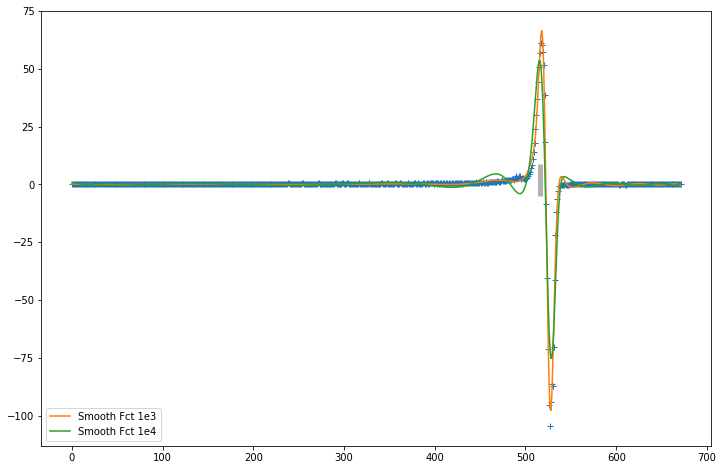

In [10]:
from scipy.interpolate import UnivariateSpline

plt.figure(figsize=(12,8))
#raw data
data = y[:]
data = data[::-1]

plt.plot(np.gradient(data), '+')

spl = UnivariateSpline(np.arange(len(data)), np.gradient(data), k=5)
spl.set_smoothing_factor(1000)
plt.plot(spl(np.arange(len(data))), label='Smooth Fct 1e3')
spl.set_smoothing_factor(10000)
plt.plot(spl(np.arange(len(data))), label='Smooth Fct 1e4')
plt.legend(loc='lower left')

max_idx = np.argmax(spl(np.arange(len(data))))
plt.vlines(max_idx, -5, 9, linewidth=5, alpha=0.3)
inflection = len(y)- max_idx + 1

print('Point of inflection:',inflection)

## Visualization

### Generating lines

**Line joining start of runoff to peak line**

In [11]:
s_1 = slope(x[start],y[start],x[0],y[0])
y_1 = (s_1*y[peak]) + y[0]
x_values = [x[start],x[peak]]
y_values = [y[start],y_1]

Slope of line: 0.003100775193798449


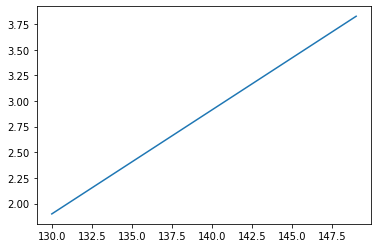

In [12]:
plt.plot(x_values, y_values)
print('Slope of line:', s_1)

**Line joining stop of runoff to inflection line**

In [13]:
s_2 = slope(x[len(y)-1],y[len(y)-1],x[stop],y[stop])
y_2 = abs((s_2*y[inflection])) + y[len(y)-1]
x2_values = [x[stop],x[inflection]]
y2_values = [y[stop],y_2]

Slope of line: -0.02058823529411765


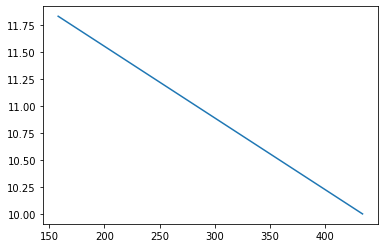

In [14]:
plt.plot(x2_values, y2_values)
print('Slope of line:', s_2)

**Line joining peak line to inflection line**

In [15]:
s_3 = slope( x[inflection],y_2, x[peak],y_1)
x3_values = [x[peak],x[inflection]]
y3_values = [y_1,y_2]

Slope of line: 0.889641282869737


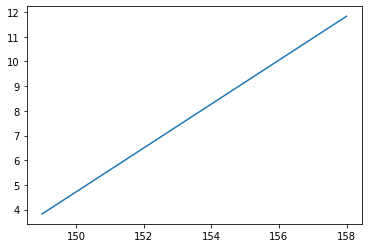

In [16]:
plt.plot(x3_values, y3_values)
print('Slope of line:', s_3)

**Some other lines**

In [17]:
X_1 = [x[peak],x[peak]]
X_2 = [x[inflection],x[inflection]]
Y_1 = [y[peak],y_1]
Y_2 = [y[inflection],y_2]

### Combined plot

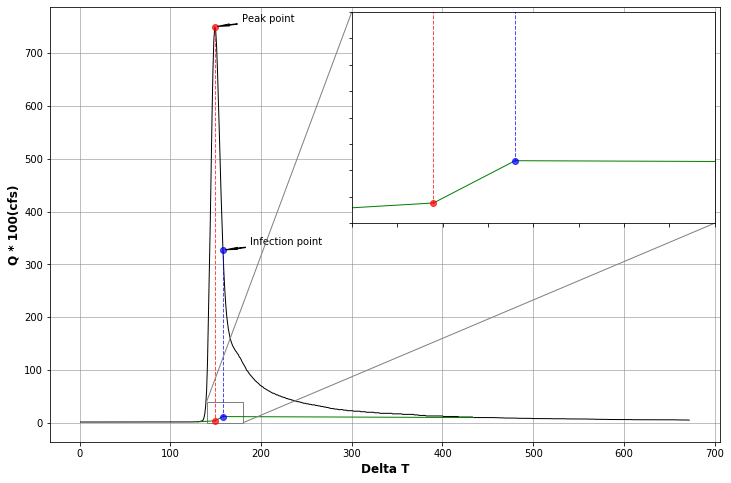

In [18]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# Plot configurations:

fig, ax = plt.subplots(figsize=[12,8])
plt.grid(color='grey', linestyle='-', linewidth=.5)
arrow_properties = dict(facecolor="black", width=0.5,headwidth=2, shrink=0.1)

# Data plot:
ax.plot(x,y, color='black', linewidth=1)

plt.xlabel("Delta T",fontsize='large', fontweight='bold')
plt.ylabel("Q * 100(cfs)",fontsize='large', fontweight='bold')

# Line plots:

st_p = plt.plot(x_values, y_values,linestyle='-',color='green', linewidth=1)
so_i = plt.plot(x2_values, y2_values,linestyle='-',color='green', linewidth=1)
p_i = plt.plot(x3_values, y3_values,linestyle='-',color='green', linewidth=1)
p_l = plt.plot(X_1, Y_1, 'o--', color='red', linewidth=1, alpha=0.7)
i_l = plt.plot(X_2, Y_2, 'o--', color='blue', linewidth=1, alpha=0.7)

# Annotates:
plt.annotate("Peak point", xy=(x[peak], y[peak]),xytext=(x[peak]+30, y[peak]+10),
             arrowprops=arrow_properties)

plt.annotate("Infection point", xy=(x[inflection], y[inflection]),xytext=(x[inflection]+30, y[inflection]+10),
             arrowprops=arrow_properties)

# For zoomed graph:



axins = zoomed_inset_axes(ax, 10, loc=1) # zoom = 6
axins.plot(x, y)
# sub region of the original image
x1, x2, y1, y2 = 140, 180, 0, 40
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
plt.yticks(visible=False)

st_p = plt.plot(x_values, y_values,linestyle='-',color='green', linewidth=1)
so_i = plt.plot(x2_values, y2_values,linestyle='-',color='green', linewidth=1)
p_i = plt.plot(x3_values, y3_values,linestyle='-',color='green', linewidth=1)
p_l = plt.plot(X_1, Y_1, 'o--', color='red', linewidth=1, alpha=0.7)
i_l = plt.plot(X_2, Y_2, 'o--', color='blue', linewidth=1, alpha=0.7)

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.draw()
plt.show()